# 线性回归示例

## 重点展示：梯度下降法(GD)；PyTorch实现机器学习的基本流程


Training a Linear Regression Model in PyTorch, source: https://machinelearningmastery.com/training-a-linear-regression-model-in-pytorch/

You’ll learn:

    How you can build a simple linear regression model from scratch in PyTorch.
    How you can apply a simple linear regression model on a dataset.
    How a simple linear regression model can be trained on a single learnable parameter.
    How a simple linear regression model can be trained on two learnable parameters.

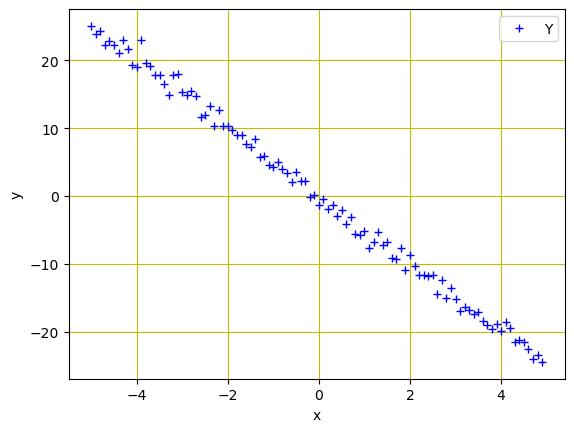

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
Y = -5 * X + torch.randn(X.size())

# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

构造一个单参数的线性回归模型（过原点）  
$h = wx$

In [2]:
# defining the function for forward pass for prediction
def forward(x): # prediction
    return w * x

# MSE (Mean Square Error) as the cost function
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

In [3]:
w = torch.tensor(99.99, requires_grad=True) 

alpha = 0.1 # learning rate
loss_list = []
iter = 20

# GD
for i in range (iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - alpha * w.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    # priting the values for understanding
    print('{},\t{},\t{}'.format(i, loss.item(), w.item()))

0,	91902.078125,	-75.0523452758789
1,	40886.7578125,	41.700904846191406
2,	18190.626953125,	-36.17353057861328
3,	8093.35888671875,	15.768718719482422
4,	3601.193115234375,	-18.876758575439453
5,	1602.67822265625,	4.231775283813477
6,	713.5613403320312,	-11.181618690490723
7,	318.0028076171875,	-0.9008846282958984
8,	142.02316284179688,	-7.758134841918945
9,	63.73175811767578,	-3.1843481063842773
10,	28.900781631469727,	-6.235064506530762
11,	13.40484619140625,	-4.2002363204956055
12,	6.510876655578613,	-5.557466983795166
13,	3.443821430206299,	-4.652194023132324
14,	2.079322576522827,	-5.256011009216309
15,	1.4722713232040405,	-4.853265285491943
16,	1.2022011280059814,	-5.121896743774414
17,	1.0820502042770386,	-4.942719459533691
18,	1.0285964012145996,	-5.062230587005615
19,	1.0048149824142456,	-4.982516765594482


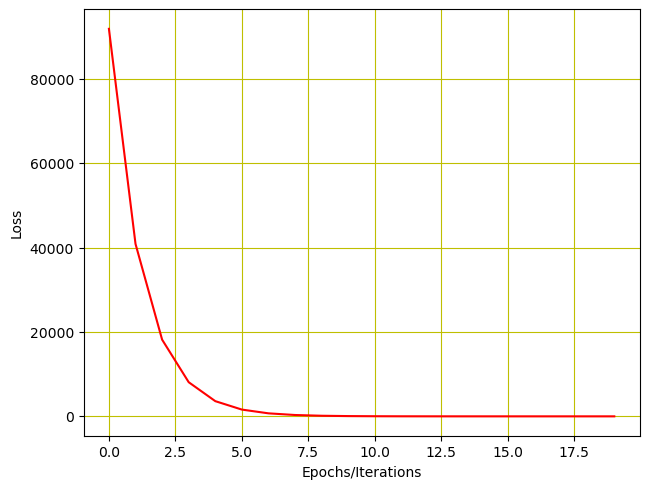

In [4]:
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

## 扩展到两个参数

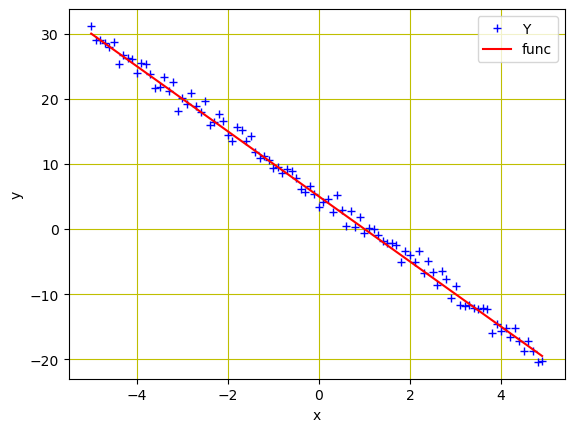

0, 	83502.5234375, 	56.62947082519531, 	-79.0998306274414
1, 	39301.484375, 	-46.97638702392578, 	-61.62339782714844
2, 	18861.3203125, 	22.303482055664062, 	-48.67831039428711
3, 	9271.9580078125, 	-23.77674102783203, 	-37.62944030761719
4, 	4688.736328125, 	7.069255828857422, 	-29.251148223876953
5, 	2446.92333984375, 	-13.42123794555664, 	-22.240055084228516
6, 	1319.82275390625, 	0.31603050231933594, 	-16.836084365844727
7, 	735.3666381835938, 	-8.79268741607666, 	-12.37553596496582
8, 	422.21832275390625, 	-2.6725668907165527, 	-8.898184776306152
9, 	248.8983154296875, 	-6.719913482666016, 	-6.055102348327637
10, 	150.0265655517578, 	-3.9919025897979736, 	-3.8211095333099365
11, 	92.10962677001953, 	-5.7891459465026855, 	-2.0066351890563965
12, 	57.426780700683594, 	-4.572239875793457, 	-0.5730282068252563
13, 	36.28963851928711, 	-5.369580268859863, 	0.5860264301300049
14, 	23.23285675048828, 	-4.8261637687683105, 	1.5052967071533203
15, 	15.085702896118164, 	-5.17943000793457, 	

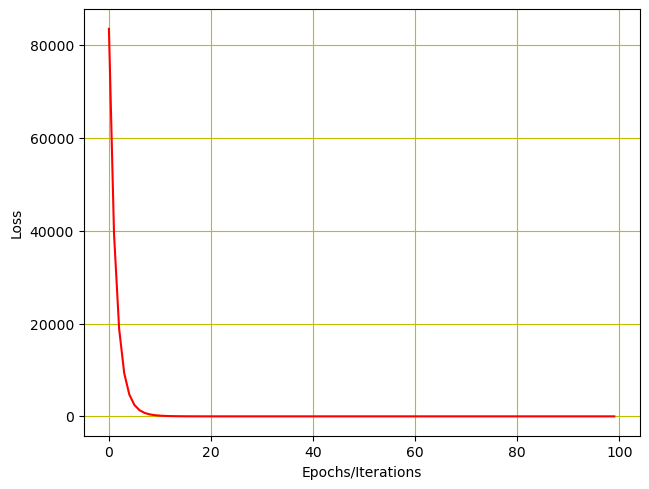

The final model:  Y =  -5.01591682434082 X+ 5.2000603675842285


In [5]:
import numpy as np
import matplotlib.pyplot as plt
 
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X + 5
Y = func + torch.randn(X.size())

# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b
 
# evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)
 
w = torch.tensor(-99.0, requires_grad=True)
b = torch.tensor(-99.0, requires_grad=True)

alpha = 0.1
loss_list = []
iter = 100
 
for i in range (iter):    
    # making predictions with forward pass
    Y_pred = forward(X)
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    # storing the calculated loss in a list
    loss_list.append(loss.item())
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    # updateing the parameters after each iteration
    w.data = w.data - alpha * w.grad.data
    b.data = b.data - alpha * b.grad.data
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    # priting the values for understanding
    print('{}, \t{}, \t{}, \t{}'.format(i, loss.item(), w.item(), b.item()))
 
# Plotting the loss after each iteration
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

print('The final model: ', 'Y = ', w.item() ,'X+', b.item()) 